In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    players = pd.read_csv("../input/FIFA19 - Ultimate Team players.csv")

In [3]:
players.head()

,player_ID,player_name,player_extended_name,quality,revision,origin,overall,club,league,nationality,...,rf,lf,rw,lw,st,price_ps4,price_xbox,price_pc,traits,specialties
0,1,Pelé,Arantes Nascimento Edson,Gold - Rare,Icon,NaN,98,Icons,Icons,Brazil,...,96.0,96,96,96,95,NaN,NaN,NaN,Finesse Shot,"Speedster, Aerial Threat, Dribbler, Play Maker..."
1,2,Maradona,Diego Maradona,Gold - Rare,Icon,NaN,97,Icons,Icons,Argentina,...,94.0,94,94,94,90,2400000.0,2954000.0,NaN,"Avoids Using Weaker Foot, Finesse Shot, Flair,...","Speedster, Dribbler, Play Maker, Distance Shoo..."
2,3,Ronaldo,Nazário de Lima Ronaldo Luís,Gold - Rare,Icon,NaN,96,Icons,Icons,Brazil,...,94.0,94,92,92,94,5697000.0,7650000.0,NaN,"Tries To Beat Defensive Line, Finesse Shot","Speedster, Dribbler, Distance Shooter, FK Spec..."
3,4,Pelé,Arantes Nascimento Edson,Gold - Rare,Icon,NaN,95,Icons,Icons,Brazil,...,94.0,94,94,94,92,2600000.0,3650000.0,4501000.0,Finesse Shot,"Speedster, Dribbler, Distance Shooter, Crosser..."
4,5,Maradona,Diego Maradona,Gold - Rare,Icon,NaN,95,Icons,Icons,Argentina,...,92.0,92,92,92,88,1695000.0,2600000.0,4201000.0,"Avoids Using Weaker Foot, Finesse Shot, Flair,...","Dribbler, Play Maker, Distance Shooter, Crosse..."


In [4]:
players.columns = players.columns.str.lower()

In [5]:
players = players.set_index("player_id")

In [6]:
players.head()

,player_name,player_extended_name,quality,revision,origin,overall,club,league,nationality,position,...,rf,lf,rw,lw,st,price_ps4,price_xbox,price_pc,traits,specialties
player_id,,,,,,,,,,,,,,,,,,,,,
1,Pelé,Arantes Nascimento Edson,Gold - Rare,Icon,NaN,98,Icons,Icons,Brazil,CAM,...,96.0,96,96,96,95,NaN,NaN,NaN,Finesse Shot,"Speedster, Aerial Threat, Dribbler, Play Maker..."
2,Maradona,Diego Maradona,Gold - Rare,Icon,NaN,97,Icons,Icons,Argentina,CAM,...,94.0,94,94,94,90,2400000.0,2954000.0,NaN,"Avoids Using Weaker Foot, Finesse Shot, Flair,...","Speedster, Dribbler, Play Maker, Distance Shoo..."
3,Ronaldo,Nazário de Lima Ronaldo Luís,Gold - Rare,Icon,NaN,96,Icons,Icons,Brazil,ST,...,94.0,94,92,92,94,5697000.0,7650000.0,NaN,"Tries To Beat Defensive Line, Finesse Shot","Speedster, Dribbler, Distance Shooter, FK Spec..."
4,Pelé,Arantes Nascimento Edson,Gold - Rare,Icon,NaN,95,Icons,Icons,Brazil,CF,...,94.0,94,94,94,92,2600000.0,3650000.0,4501000.0,Finesse Shot,"Speedster, Dribbler, Distance Shooter, Crosser..."
5,Maradona,Diego Maradona,Gold - Rare,Icon,NaN,95,Icons,Icons,Argentina,CAM,...,92.0,92,92,92,88,1695000.0,2600000.0,4201000.0,"Avoids Using Weaker Foot, Finesse Shot, Flair,...","Dribbler, Play Maker, Distance Shooter, Crosse..."


In [7]:
players["quality_level"] = players["quality"].apply(lambda x: x.split(" - ")[0])
players["quality_is_rare"] = players["quality"].apply(lambda x: len(x.split(" - ")) == 2)

In [8]:
def calculate_chemistry(player, players):
    return pd.Series((player["nationality"] == players["nationality"].values).astype(int) + \
(player["league"] == players["league"].values).astype(int) + \
(player["club"] == players["club"].values).astype(int))

In [10]:
chemistry_matrix = players.apply(lambda x: calculate_chemistry(x, players), axis=1)
chemistry_matrix.columns = chemistry_matrix.index

In [11]:
chemistry_matrix

player_id,1,2,3,4,5,6,7,8,9,10,...,17012,17013,17014,17015,17016,17017,17018,17019,17020,17021
player_id,,,,,,,,,,,,,,,,,,,,,
1,3,2,3,3,2,2,3,2,3,2,...,0,0,1,0,0,0,0,0,0,0
2,2,3,2,2,3,2,2,2,2,2,...,0,0,0,0,0,0,0,1,0,0
3,3,2,3,3,2,2,3,2,3,2,...,0,0,1,0,0,0,0,0,0,0
4,3,2,3,3,2,2,3,2,3,2,...,0,0,1,0,0,0,0,0,0,0
5,2,3,2,2,3,2,2,2,2,2,...,0,0,0,0,0,0,0,1,0,0
6,2,2,2,2,2,3,2,2,2,2,...,0,0,0,0,0,0,0,0,0,1
7,3,2,3,3,2,2,3,2,3,2,...,0,0,1,0,0,0,0,0,0,0
8,2,2,2,2,2,2,2,3,2,2,...,0,0,0,0,0,0,0,0,0,0
9,3,2,3,3,2,2,3,2,3,2,...,0,0,1,0,0,0,0,0,0,0


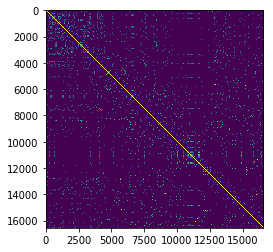

In [12]:
plt.imshow(chemistry_matrix)

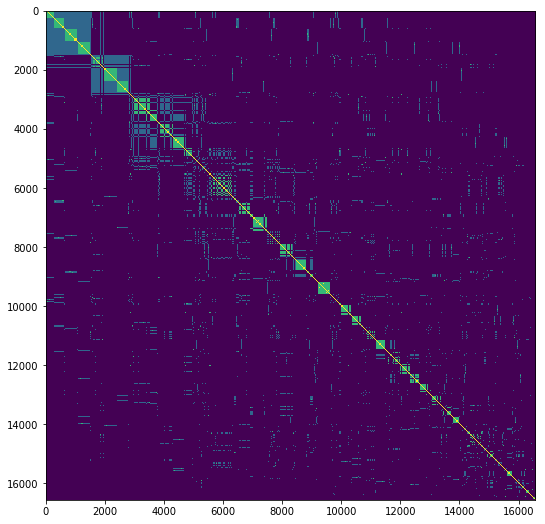

In [17]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()
ax.imshow(chemistry_matrix.loc[chemistry_matrix.apply(np.mean).sort_values(ascending=False).index, chemistry_matrix.apply(np.mean).sort_values(ascending=False).index])

In [18]:
players.loc[chemistry_matrix.apply(np.mean).sort_values(ascending=False).index].unique(["club", "league", "nationaliy"])

AttributeError: 'DataFrame' object has no attribute 'unique'

In [23]:
players_chemistry = players[["club", "league", "nationality"]]
players_chemistry["chemistry"] = chemistry_matrix.apply(np.mean)

C:\Users\Jan\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
players_chemistry.groupby(["league", "nationality"])["chemistry"].mean().reset_index().sort_values("chemistry", ascending=False).head(100)

,league,nationality,chemistry
1172,Premier League,England,0.144159
414,EFL Championship,England,0.141007
172,Bundesliga,England,0.138033
1393,Serie A TIM,England,0.137671
857,LaLiga Santander,England,0.136825
467,EFL League One,England,0.136532
1006,Ligue 1 Conforama,England,0.136221
1075,Major League Soccer,England,0.134979
513,EFL League Two,England,0.134520
1133,Meiji Yasuda J1 League,England,0.129818
